(1) Download 5 JSON files from Indiegogo dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Read in the data
df1 = pd.read_csv('indiegogo_2023/Indiegogo1.csv')
df2 = pd.read_csv('indiegogo_2023/Indiegogo2.csv')
df3 = pd.read_csv('indiegogo_2023/Indiegogo3.csv')
df4 = pd.read_csv('indiegogo_2023/Indiegogo4.csv')
df5 = pd.read_csv('indiegogo_2023/Indiegogo5.csv')

(2) Data Preprocessing

In [ ]:
# Transform the data into a list
list1 = df1['title'].to_list()
list2 = df2['title'].to_list()
list3 = df3['title'].to_list()
list4 = df4['title'].to_list()
list5 = df5['title'].to_list()

In [ ]:
# Combine the lists
title_list = list1 + list2 + list3 + list4 + list5
# Check if there's any missing value
print('Missing value in the list: ', title_list.count(''))
print('Missing value in the list: ', title_list.count(np.nan))
# Check if there's any duplicate value
print('Duplicate value in the list: ', len(title_list) - len(set(title_list)))

Missing value in the list:  0
Missing value in the list:  34
Duplicate value in the list:  111861


In [ ]:
# Remove the np.nan value
title_list = [x for x in title_list if str(x) != 'nan']
print('Missing value in the list: ', title_list.count(np.nan))
# Remove the duplicate value
title_list = list(set(title_list))
# Check the length of the list
print('Length of the list: ', len(title_list))

Missing value in the list:  0
Length of the list:  24956


Use 3 Texual Feature Engineering Methods reducing sparsity

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.utils import simple_preprocess
from nltk.stem import PorterStemmer

In [ ]:
# Use 3 textual feature engineering methods
# 1. Remove the stop words
removed_title = [remove_stopwords(title) for title in title_list]
# 2. Tokenize the text
tokenized_title = [simple_preprocess(rtitle, deacc=True) for rtitle in removed_title] # deacc=True removes punctuations
# 3. Stemming
ps = PorterStemmer()
stemmed_title = [[ps.stem(word) for word in token] for token in tokenized_title]

In [ ]:
# Remove the empty list from stemmed_title
stemmed_title = [x for x in stemmed_title if x != []]
len(stemmed_title)

24906

In [25]:
clean_list = [' '.join(clean_title) for clean_title in stemmed_title]
# transform stemmed_title into a dataframe
clean_df = pd.DataFrame(clean_list)
clean_df.columns = ['title']
clean_df.head()

,title
0,make jamaica clean jamaica green
1,trelawear discreet emerg respons necklac
2,jello shot anim thesi film
3,greek bee
4,help child refuge now


(3) Generate term-document matrix

In [26]:
# Activate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer
vect = CountVectorizer()  
vects = vect.fit_transform(clean_df['title'])

# Select from the data set
td = pd.DataFrame(vects.todense())  
td.columns = vect.get_feature_names_out()
tdmatrix = td.T
tdmatrix.columns = ['Doc '+str(i) for i in range(1, len(tdmatrix.columns)+1)]
tdmatrix['total_count'] = tdmatrix.sum(axis=1)

# Select top 25 words
tdmatrix_25 = tdmatrix.sort_values(by ='total_count',ascending=False)[:25] 
# Print the 25 rows 
print(tdmatrix_25.drop(columns=['total_count']))

         Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
the          0      0      0      0      0      0      1      0      0   
help         0      0      0      0      1      0      0      0      0   
world        0      0      0      0      0      0      0      0      0   
film         0      0      1      0      0      0      0      0      0   
new          0      0      0      0      0      0      0      0      0   
game         0      0      0      0      0      0      0      0      0   
book         0      0      0      0      0      0      0      0      0   
project      0      0      0      0      0      0      0      0      1   
your         0      0      0      0      0      0      0      0      0   
short        0      0      0      0      0      0      0      0      0   
for          0      0      0      0      0      0      0      0      0   
fund         0      0      0      0      0      0      0      0      0   
first        0      0      0      0   

(4) Apply TF/IDF on the matrix

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf = TfidfVectorizer()
train_data = tfidf.fit_transform(tdmatrix.T)
tfidf_df = pd.DataFrame(train_data.toarray(),columns=tfidf.get_feature_names_out())
print(tfidf_df)

        aa  aaa  aadongl  aaib  aamjiwnaang  aapi  aarogyaseva  aaron  aarzu  \
0      1.0  0.0      0.0   0.0          0.0   0.0          0.0    0.0    0.0   
1      0.0  1.0      0.0   0.0          0.0   0.0          0.0    0.0    0.0   
2      0.0  0.0      1.0   0.0          0.0   0.0          0.0    0.0    0.0   
3      0.0  0.0      0.0   1.0          0.0   0.0          0.0    0.0    0.0   
4      0.0  0.0      0.0   0.0          1.0   0.0          0.0    0.0    0.0   
...    ...  ...      ...   ...          ...   ...          ...    ...    ...   
21728  0.0  0.0      0.0   0.0          0.0   0.0          0.0    0.0    0.0   
21729  0.0  0.0      0.0   0.0          0.0   0.0          0.0    0.0    0.0   
21730  0.0  0.0      0.0   0.0          0.0   0.0          0.0    0.0    0.0   
21731  0.0  0.0      0.0   0.0          0.0   0.0          0.0    0.0    0.0   
21732  0.0  0.0      0.0   0.0          0.0   0.0          0.0    0.0    0.0   

       aasana  ...  丨the  九月初九   咒文   坊

(5) Use LSA and LDA to cluster the result of the term-document matrix and visualize the clustering result

In [29]:
from gensim import corpora, models, matutils
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# Compute c_v coherence for various number of topics to determine the best number of topics
coherence_values = []
model_list = []
dictionary = corpora.Dictionary(stemmed_title)
for num_topics in range(1, 20):
    # generate LSA model
    # Vectorize document using TF-IDF
    tfidf = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1))
    # Fit and Transform the documents
    train_data = tfidf.fit_transform(tdmatrix.T) 
    # Create SVD object
    lsa = TruncatedSVD(n_components=num_topics, n_iter=100, random_state=42)
    # Fit SVD model on data
    lsa.fit_transform(train_data)
    model_list.append(lsa)
    # Convert the sklearn LSA model to a Gensim LsiModel for coherence calculation
    lsa_gensim = models.LsiModel(matutils.Sparse2Corpus(train_data.T), id2word=dictionary, num_topics=num_topics)
    coherencemodel = CoherenceModel(model=lsa_gensim, texts=stemmed_title, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

KeyboardInterrupt: 

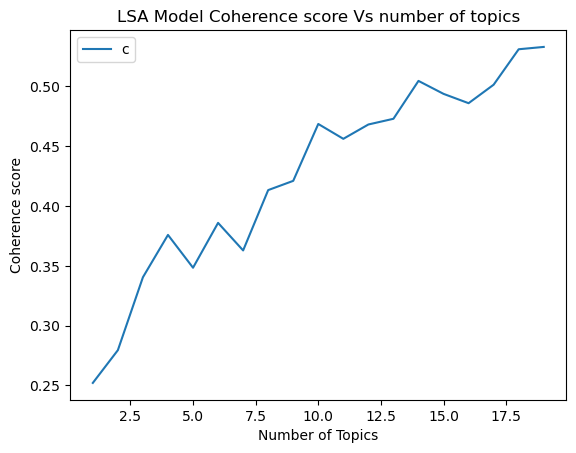

In [ ]:
# Plot the coherence values
import matplotlib.pyplot as plt
x = range(1, 20)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('LSA Model Coherence score Vs number of topics')
plt.show()
# 1,3,10 are the good number of topics

Topic 0:  ['sbin', 'salvag', 'rac', 'latticia', 'ganhub']
Topic 1:  ['main', 'bonni', 'insol', 'potter', 'peppichino']
Topic 2:  ['indigiblock', 'alterna', 'contro', 'kiskeya', 'detect']
Topic 3:  ['pureterg', 'alain', 'pocketdrum', 'ranchland', 'demolit']
Topic 4:  ['akhenaten', 'servic', 'coolit', 'cultivar', 'bacon']
Topic 5:  ['gnome', 'irrit', 'microraptor', 'opedspac', 'fastpitch']
Topic 6:  ['udgivels', 'duffel', 'cinci', 'rightplantz', 'tonic']
Topic 7:  ['skid', 'isra', 'ro', 'aout', 'finland']
Topic 8:  ['knoxvil', 'orthot', 'screeneo', 'underwood', 'parkinson']
Topic 9:  ['ambulatori', 'kma', 'rockpit', 'digo', 'myrgh']


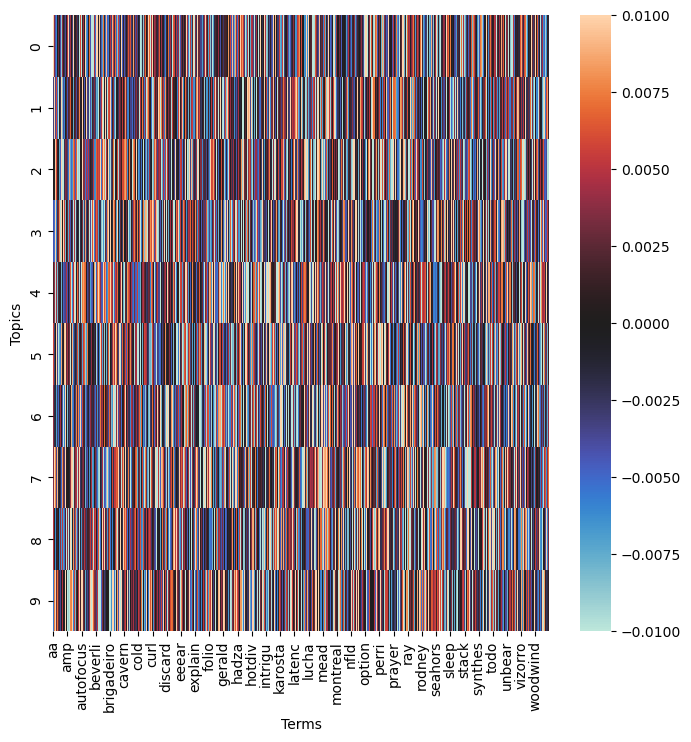

In [ ]:
# Use LSA (Latent Semantic Analysis) to cluster the result of the Term-Document matrix 
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize document using TF-IDF
tfidf = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1))
# Fit and Transform the documents
train_data = tfidf.fit_transform(tdmatrix.T) 
# Define the number of topics or components
num_components = 10
# Create SVD object
lsa = TruncatedSVD(n_components=num_components, n_iter=100, random_state=42)
# Fit SVD model on data
lsa.fit_transform(train_data)
# Get Singular values and Components
Sigma = lsa.singular_values_
V_transpose = lsa.components_.T
# Print the topics with their terms
terms = tfidf.get_feature_names_out()
for index, component in enumerate(lsa.components_):
 zipped = zip(terms, component)
 top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:5]
 top_terms_list=list(dict(top_terms_key).keys())
 print("Topic "+str(index)+": ",top_terms_list)

import seaborn as sns
compnt = pd.DataFrame(lsa.components_, columns=terms)
# Plot the heatmap and set colorbar
plt.figure(figsize=(8, 8))
sns.heatmap(compnt.head(10), vmin=-0.01, vmax=0.01, center=0, yticklabels=1)
plt.xlabel('Terms')
plt.ylabel('Topics')
plt.show()

In [ ]:
# LDAModel
import gensim
# To generate an LDA model using Gensim, we need to convert the term-document matrix from the scikit-learn format 
# to a Gensim compatible format (BoW representation). 
# Create a dictionary from the stemmed titles
# Create a term-document matrix using the dictionary
corpus = [dictionary.doc2bow(doc) for doc in stemmed_title]
# Compute c_v coherence for various number of topics to determine the best number of topics
coherence_values = []
model_list = []
for num_topics in range(1, 20):
    # generate LDA model
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=20)
    doc_lda = ldamodel[corpus]
    coherencemodel = CoherenceModel(model=ldamodel, texts=stemmed_title, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

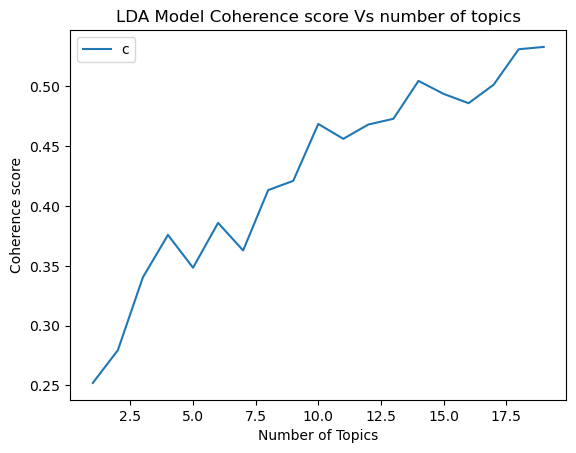

In [ ]:
# Plot the coherence values
import matplotlib.pyplot as plt
x = range(1, 20)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('LDA Model Coherence score Vs number of topics')
plt.show()